In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Iris Dataset

     sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


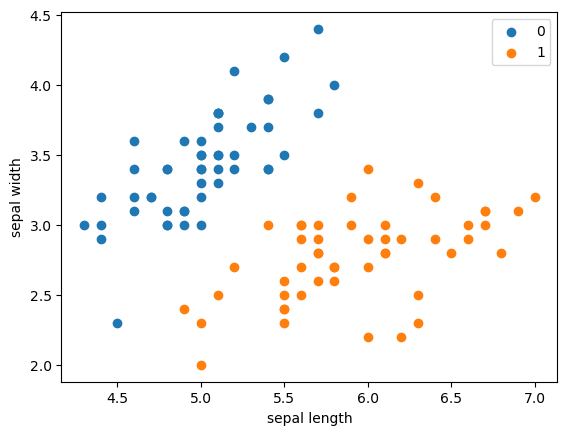

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.columns = [
    "sepal length", "sepal width", "petal length", "petal width", "label"
]

print(df)

plt.scatter(df[:50]["sepal length"], df[:50]["sepal width"], label="0")
plt.scatter(df[50:100]["sepal length"], df[50:100]["sepal width"], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()


## Preceptron Algorithm Implementation

In [3]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])

### 更新规则推导

感知机目标：
$$
\min_{\mathbf{w},b} \sum_{i\in M} -y_i(\mathbf{w}\cdot \mathbf{x}_i + b)\\
$$
其中$M$是错分样本的集合，为了使得$L(\mathbf{w}, b) = -y_i(\mathbf{w}\cdot x + b)$尽快变为负数（表示分类正确）

对于权重$\mathbf{w}$，
$$
\dfrac{\partial L}{\partial \mathbf{w}} = -y_i \mathbf{x}_i
$$
对于偏置$b$，
$$
\dfrac{\partial L}{\partial b} = -y_i\\
$$
根据梯度下降，
$$
\begin{aligned}
\mathbf{w} &\leftarrow \mathbf{w} - \eta \dfrac{\partial L}{\partial \mathbf{w}} = \mathbf{w} + \eta y_i \mathbf{x}_i\\
b &\leftarrow b - \eta \dfrac{\partial L}{\partial b} = b + \eta y_i
\end{aligned}
$$


In [4]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=float)
        self.b = 0
        self.l_rate = 0.01

    def sign(self, x, w, b):
        return np.dot(x, w) + b

    def fit(self, X_train, y_train):
        is_wrong = True
        while is_wrong:
            wrong_cnt = 0
            for i in range(len(X_train)):
                if y_train[i] * self.sign(X_train[i], self.w, self.b) <= 0:
                    self.w += self.l_rate * np.dot(y_train[i], X_train[i])
                    self.b += self.l_rate * y_train[i]
                    wrong_cnt += 1
            if wrong_cnt == 0:
                is_wrong = False

        return "Perceptron model trained."

In [5]:
percetron = Model()
percetron.fit(X, y)

'Perceptron model trained.'

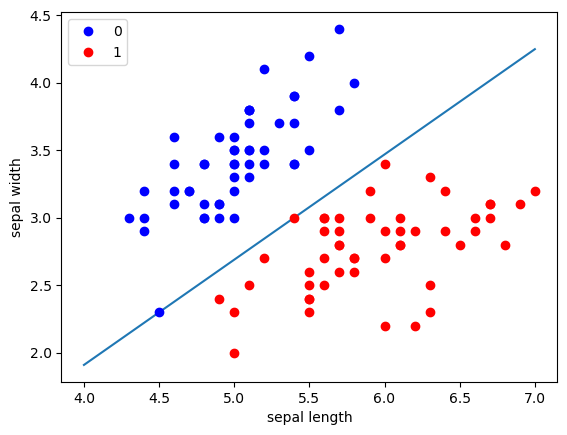

In [6]:
x_points = np.linspace(4, 7, 10)
y_ = - (percetron.w[0] * x_points + percetron.b) / percetron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], "bo", label="0")
plt.plot(data[50:100, 0], data[50:100, 1], "ro", label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

## scikit-learn

In [7]:
import sklearn
from sklearn.linear_model import Perceptron
sklearn.__version__

'1.6.1'

In [8]:
clf = Perceptron(fit_intercept=True, max_iter=1000, tol=None, eta0=0.01, shuffle=True, random_state=0)
clf.fit(X, y)
print(clf.intercept_)

[-1.16]


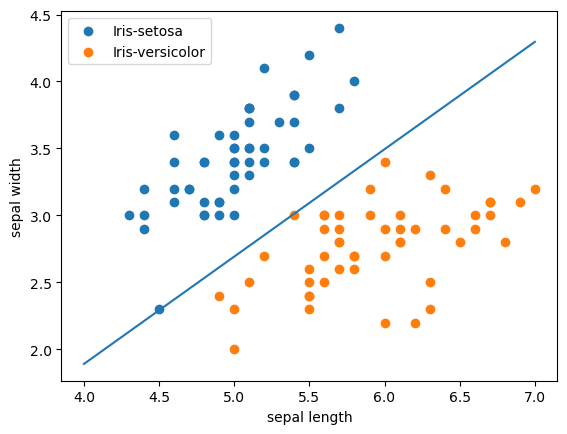

In [9]:
plt.scatter(df[:50]["sepal length"], df[:50]["sepal width"], label="Iris-setosa")
plt.scatter(df[50:100]["sepal length"], df[50:100]["sepal width"], label="Iris-versicolor")
x_points = np.linspace(4, 7, 10)
y_ = - (clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, y_)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()